 # **Virality Predictor**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import re
from collections import Counter
from sklearn.model_selection import train_test_split

In [24]:
train_csv_path = 'data/train_advance.csv/train_advance.csv'
df = pd.read_csv(train_csv_path)


In [25]:
df.head()

,Unnamed: 0.1,Unnamed: 0,location_id,profile_id,sid,sid_profile,post_id,post_type,description,numbr_likes,...,region,cd,phone,aj_exact_city_match,aj_exact_country_match,blurb,dir_city_name,dir_country_name,lat,lng
0,11420,11755,340283947,829324748,28919418,295070,Bka_6xunYma,1,Cheers to wine O‚Äôclock ü•Ç (üì∏: @aob1085),4985,...,NaN,ES,+34 936 65 77 41,False,False,NaN,El Prat de Llobregat,Spain,2,41
1,24264,24967,2631322,199074048,42114489,4342099,BxaZS4fA_nV,1,#malcapuyaisland #bananaisland #bulogisland,57,...,NaN,PH,NaN,True,False,NaN,Coron,Philippines,120,11
2,16286,16768,668571209,3280121227,19193237,2554203,BxmEzQUFocM,1,üî∏\\nSchwarzkehlchen (Saxicola rubicola) ‚Ä¢...,1576,...,Saxony-Anhalt,DE,NaN,False,True,NaN,NaN,NaN,11,51
3,11139,11467,238461670,5625643374,11733129,3465973,Bjq5KFGlJvM,1,Eared Grebe spotted at one of my favourite spo...,29,...,NaN,CA,NaN,True,False,NaN,NaN,NaN,-118,52
4,27320,28111,1005642734,1557071010,8540244,3541402,BweviowATmj,1,–ü–õ–ê–ö–ê–¢–¨ –í –ú–û–°–¢–ê–• - –≠–¢–û –ù–û–†...,1487,...,NaN,RU,79214201362,False,False,—Ü–µ–Ω—Ç—Ä –∏–Ω–∏—Ü–∏–∞—Ü–∏–∏ —Ç–≤–æ—Ä—á–µ—Å—Ç...,Aptekarskiy,Russia,30,59


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22924 entries, 0 to 22923
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            22924 non-null  int64  
 1   Unnamed: 0              22924 non-null  int64  
 2   location_id             22924 non-null  int64  
 3   profile_id              22924 non-null  int64  
 4   sid                     22924 non-null  int64  
 5   sid_profile             22924 non-null  int64  
 6   post_id                 22890 non-null  object 
 7   post_type               22924 non-null  int64  
 8   description             22333 non-null  object 
 9   numbr_likes             22924 non-null  int64  
 10  number_comments         22924 non-null  int64  
 11  profile_name            22924 non-null  object 
 12  firstname_lastname      22522 non-null  object 
 13  following               22924 non-null  object 
 14  followers               22924 non-null

### Check for null values




In [27]:
missing_values = df.isnull().sum()
missing_values

Unnamed: 0.1                  0
Unnamed: 0                    0
location_id                   0
profile_id                    0
sid                           0
sid_profile                   0
post_id                      34
post_type                     0
description                 591
numbr_likes                   0
number_comments               0
profile_name                  0
firstname_lastname          402
following                     0
followers                     0
n_posts                       5
url                        8399
is_business_account           5
name                          0
zip                        9967
city                       1907
region                    22529
cd                         1231
phone                     12956
aj_exact_city_match         335
aj_exact_country_match      335
blurb                     16073
dir_city_name             12263
dir_country_name          12263
lat                           0
lng                           0
dtype: i

### Columns with null val

In [28]:
null_counts = df.isnull().sum()

columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

post_id                      34
description                 591
firstname_lastname          402
n_posts                       5
url                        8399
is_business_account           5
zip                        9967
city                       1907
region                    22529
cd                         1231
phone                     12956
aj_exact_city_match         335
aj_exact_country_match      335
blurb                     16073
dir_city_name             12263
dir_country_name          12263
dtype: int64

In [29]:
# Drop rows with missing post_id
df = df.dropna(subset=['post_id'])

# Fill missing description with 'No Description'
df['description'] = df['description'].fillna('No Description')

# Fill missing firstname_lastname with 'Unknown'
df['firstname_lastname'] = df['firstname_lastname'].fillna('Unknown')

# Fill missing n_posts with 0
df['n_posts'] = df['n_posts'].fillna(0)

# Drop url column
df = df.drop(columns=['url'])

# Fill missing is_business_account with the mode
df['is_business_account'] = df['is_business_account'].fillna(df['is_business_account'].mode()[0])

# Fill missing zip with '00000'
df['zip'] = df['zip'].fillna('00000')

# Fill missing city with 'Unknown'
df['city'] = df['city'].fillna('Unknown')

# Drop region column
df = df.drop(columns=['region'])

# Fill missing cd with 'Unknown'
df['cd'] = df['cd'].fillna('Unknown')

# Drop phone column
df = df.drop(columns=['phone'])

# Fill missing aj_exact_city_match and aj_exact_country_match with the mode
df['aj_exact_city_match'] = df['aj_exact_city_match'].fillna(df['aj_exact_city_match'].mode()[0])
df['aj_exact_country_match'] = df['aj_exact_country_match'].fillna(df['aj_exact_country_match'].mode()[0])

# Drop blurb column
df = df.drop(columns=['blurb'])

# Drop dir_city_name and dir_country_name columns
df = df.drop(columns=['dir_city_name', 'dir_country_name'])

# Verify that no missing values remain
print(df.isnull().sum())


Unnamed: 0.1              0
Unnamed: 0                0
location_id               0
profile_id                0
sid                       0
sid_profile               0
post_id                   0
post_type                 0
description               0
numbr_likes               0
number_comments           0
profile_name              0
firstname_lastname        0
following                 0
followers                 0
n_posts                   0
is_business_account       0
name                      0
zip                       0
city                      0
cd                        0
aj_exact_city_match       0
aj_exact_country_match    0
lat                       0
lng                       0
dtype: int64


C:\Users\q1\AppData\Local\Temp\ipykernel_9104\3906028067.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_business_account'] = df['is_business_account'].fillna(df['is_business_account'].mode()[0])
C:\Users\q1\AppData\Local\Temp\ipykernel_9104\3906028067.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['aj_exact_city_match'] = df['aj_exact_city_match'].fillna(df['aj_exact_city_match'].mode()[0])
C:\Users\q1\AppData\Local\Temp\ipykernel_9104\3906028067.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is dep

### check for duplicates

In [30]:
print('Number of duplicated rows：',df.duplicated().sum())

Number of duplicated rows： 0


In [31]:
numerical_summary = df.describe()
print('Numerical variable summary: \n',numerical_summary)


Numerical variable summary: 
        Unnamed: 0.1    Unnamed: 0   location_id    profile_id           sid  \
count  22890.000000  22890.000000  2.289000e+04  2.289000e+04  2.289000e+04   
mean   14329.143119  14748.843338  2.033260e+14  1.641782e+09  2.209117e+07   
std     8259.862627   8499.857758  4.876490e+14  2.517163e+09  1.244507e+07   
min        0.000000      0.000000  7.280000e+02  2.800000e+01  3.141270e+05   
25%     7179.250000   7399.250000  2.134694e+08  5.407369e+07  1.067902e+07   
50%    14356.500000  14781.500000  2.714855e+08  3.620764e+08  1.970937e+07   
75%    21467.750000  22095.750000  1.052120e+14  1.988990e+09  3.450087e+07   
max    28654.000000  29484.000000  2.840779e+15  1.423139e+10  4.333045e+07   

        sid_profile     post_type    numbr_likes  number_comments  \
count  2.289000e+04  22890.000000   22890.000000     22890.000000   
mean   2.934844e+06      1.028222    4718.546134        75.964351   
std    1.298293e+06      0.165610   17803.717653   

In [32]:
categorical_summary = df.describe(include=['object'])
print('Categorical variable summary: \n',categorical_summary)


Categorical variable summary: 
             post_id     description profile_name firstname_lastname following  \
count         22890           22890        22890              22890     22890   
unique        22791           22094        19238              18657      4338   
top     BvmcBahHkU4  No Description  infatuation            Unknown         0   
freq              3             590           13                402       116   

                      name    zip     city     cd  
count                22890  22890    22890  22890  
unique               16987   7517     5762    184  
top     New York, New York  00000  Unknown     US  
freq                   276   9955     1904   5827  


### Data cleaning

In [33]:
data_cleaned = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
data_cleaned.head()

,location_id,profile_id,sid,sid_profile,post_id,post_type,description,numbr_likes,number_comments,profile_name,...,n_posts,is_business_account,name,zip,city,cd,aj_exact_city_match,aj_exact_country_match,lat,lng
0,340283947,829324748,28919418,295070,Bka_6xunYma,1,Cheers to wine O‚Äôclock ü•Ç (üì∏: @aob1085),4985,78,oprahmagazine,...,3612.0,True,"Positano, Italy",00000,"Barcelona, Spain",ES,False,False,2,41
1,2631322,199074048,42114489,4342099,BxaZS4fA_nV,1,#malcapuyaisland #bananaisland #bulogisland,57,2,jpadi_33,...,95.0,False,"Coron, Palawan",5316,"Coron, Palawan",PH,True,False,120,11
2,668571209,3280121227,19193237,2554203,BxmEzQUFocM,1,üî∏\\nSchwarzkehlchen (Saxicola rubicola) ‚Ä¢...,1576,15,m4r10_p13ch4ty,...,1259.0,True,Saxony-Anhalt,00000,Unknown,DE,False,True,11,51
3,238461670,5625643374,11733129,3465973,Bjq5KFGlJvM,1,Eared Grebe spotted at one of my favourite spo...,29,5,vagabondesi,...,39.0,False,"Jasper, Alberta",T0E,"Jasper, Alberta",CA,True,False,-118,52
4,1005642734,1557071010,8540244,3541402,BweviowATmj,1,–ü–õ–ê–ö–ê–¢–¨ –í –ú–û–°–¢–ê–• - –≠–¢–û –ù–û–†...,1487,11,elena__mirra,...,1251.0,True,–ê—É—Ä–∞–ú–∏—Ä—Ä–∞,"–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, —É–ª. –ë. –ó–µ–...","Saint Petersburg, Russia",RU,False,False,30,59


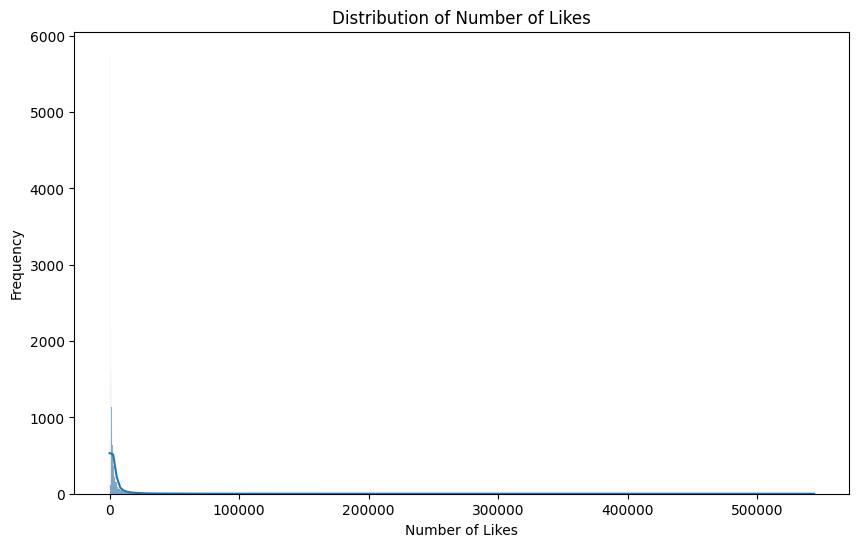

In [34]:
data_cleaned['post_type'] = data_cleaned['post_type'].map({1: 'Photo', 2: 'Video'})

plt.figure(figsize=(10, 6))
sb.histplot(data_cleaned['numbr_likes'], kde=True)
plt.title('Distribution of Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()

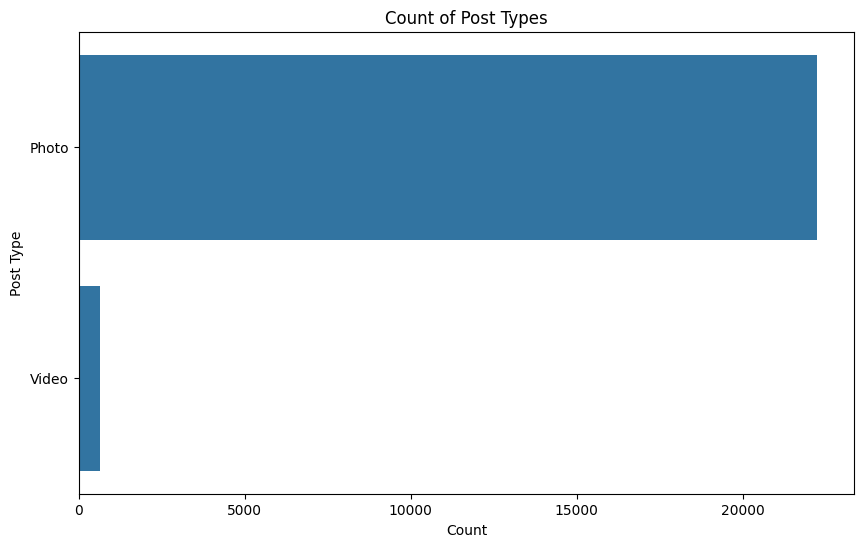

In [35]:

# Analyze categorical features
plt.figure(figsize=(10, 6))
sb.countplot(y=data_cleaned['post_type'])
plt.title('Count of Post Types')
plt.xlabel('Count')
plt.ylabel('Post Type')
plt.show()

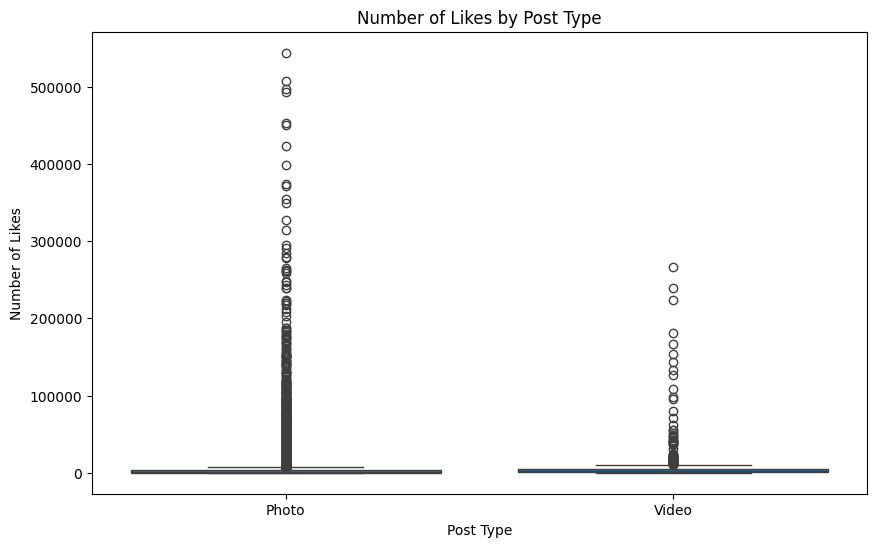

In [36]:
# Relationship between features and target variable
plt.figure(figsize=(10, 6))
sb.boxplot(x='post_type', y='numbr_likes', data=data_cleaned)
plt.title('Number of Likes by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Number of Likes')
plt.show()

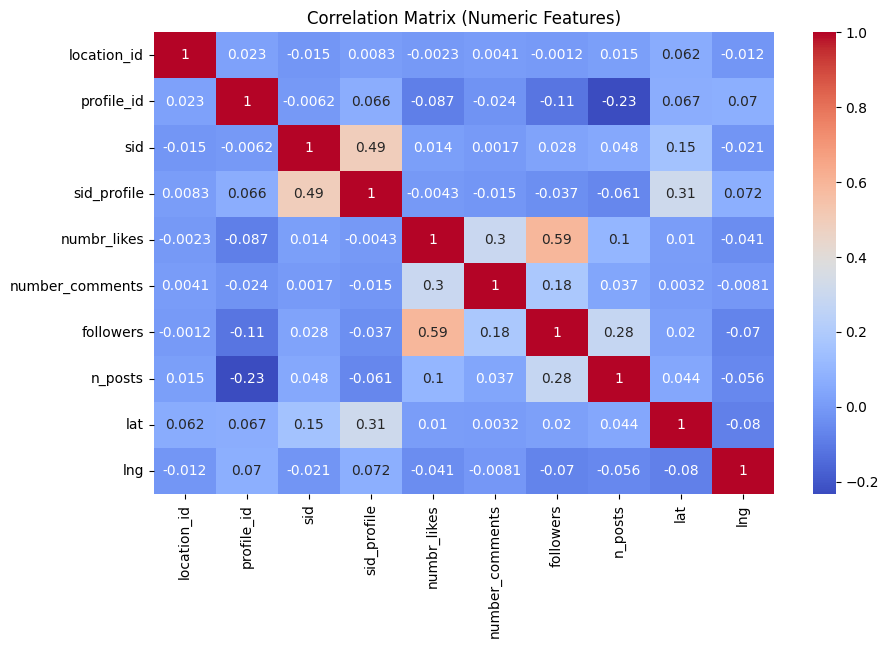

In [37]:
numeric_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
numeric_data = data_cleaned[numeric_columns]

correlation_matrix_numeric = numeric_data.corr()
plt.figure(figsize=(10, 6))
sb.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

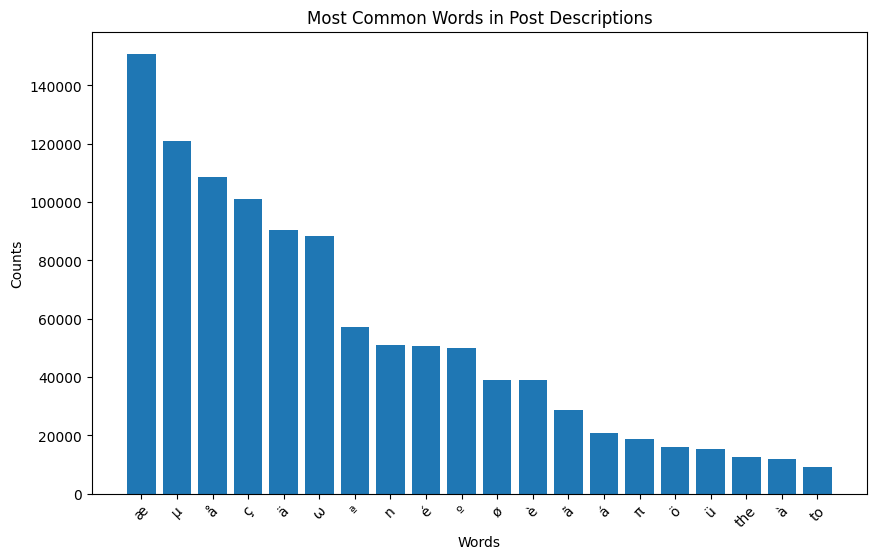

In [38]:

# Tokenize the descriptions
descriptions = data_cleaned['description'].dropna().tolist()
words = []
for description in descriptions:
    words.extend(re.findall(r'\b\w+\b', description.lower()))

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common words
common_words = word_counts.most_common(20)

words, counts = zip(*common_words)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Most Common Words in Post Descriptions')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

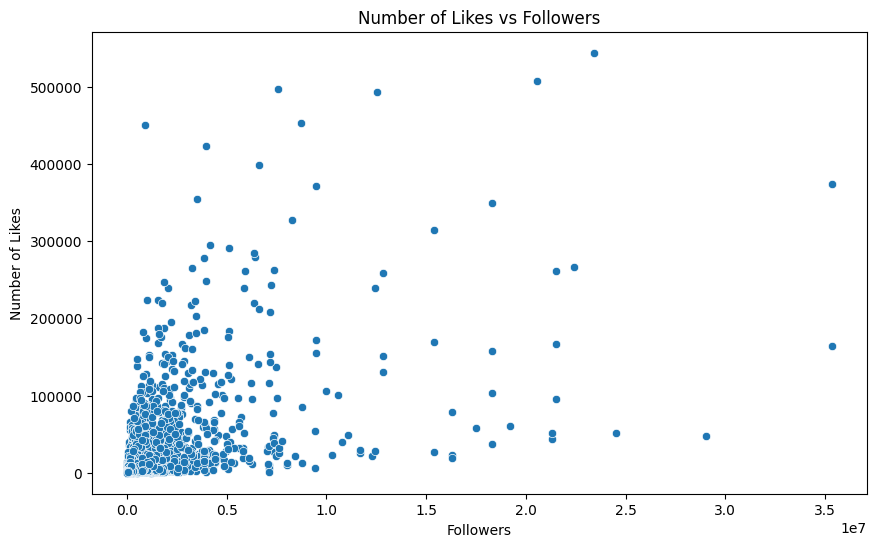

In [39]:

plt.figure(figsize=(10, 6))
sb.scatterplot(x='followers', y='numbr_likes', data=data_cleaned)
plt.title('Number of Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Number of Likes')
plt.show()

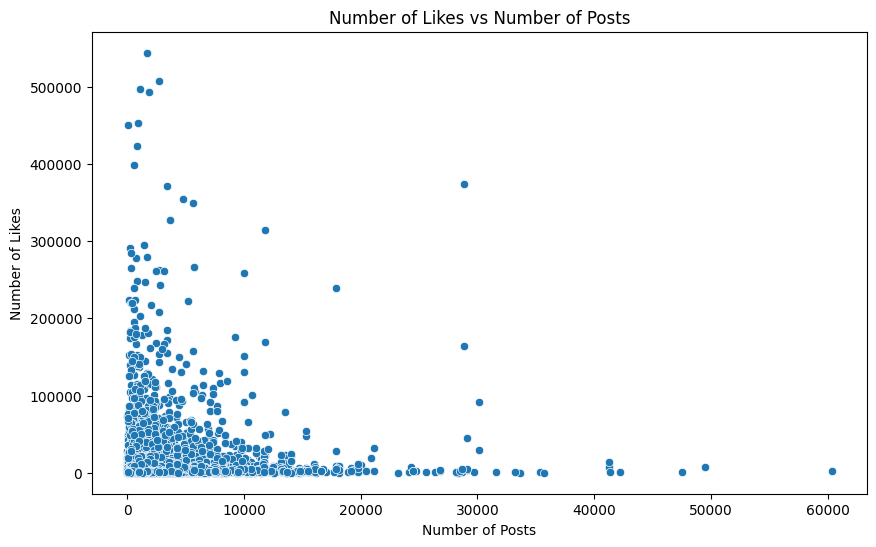

In [40]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='n_posts', y='numbr_likes', data=data_cleaned)
plt.title('Number of Likes vs Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Likes')
plt.show()

### train test split

In [53]:
X = data_cleaned.drop(columns=['numbr_likes', 'number_comments'])
y = data_cleaned[['numbr_likes', 'number_comments']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18312 entries, 3413 to 15820
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_id             18312 non-null  int64  
 1   profile_id              18312 non-null  int64  
 2   sid                     18312 non-null  int64  
 3   sid_profile             18312 non-null  int64  
 4   post_id                 18312 non-null  object 
 5   post_type               18312 non-null  object 
 6   description             18312 non-null  object 
 7   profile_name            18312 non-null  object 
 8   firstname_lastname      18312 non-null  object 
 9   following               18312 non-null  object 
 10  followers               18312 non-null  int64  
 11  n_posts                 18312 non-null  float64
 12  is_business_account     18312 non-null  bool   
 13  name                    18312 non-null  object 
 14  zip                     18312 non-null  

In [51]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18312 entries, 3413 to 15820
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   numbr_likes      18312 non-null  int64
 1   number_comments  18312 non-null  int64
dtypes: int64(2)
memory usage: 429.2 KB
